# Data Analysis and Prediction for Nepal Earthquake Severity Index

In this data analysis and prediction project, I have worked with the Nepal Earthquake Severity Index dataset, which provides valuable information about earthquake severity, vulnerability, and related factors in Nepal. Our goal is to clean, process, and analyze this dataset to gain insights and build a predictive model for earthquake severity. We will use a decision tree model to make predictions about the severity of future earthquake cases based on factors such as earthquake intensity, population, and vulnerability of housing and population. This model will be continuously improved and updated as we validate its predictions against first-hand reports and incorporate better data sources.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [2]:
# Step 1: Data Cleaning and Preprocessing
# Load the dataset from XLSX file
data = pd.read_excel('~/Downloads/nepal_earthquake_data.xlsx')

# Handle missing values
data.dropna(inplace=True)

# Check for duplicates
data.drop_duplicates(inplace=True)

data.head()

,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard_Intensity,Exposure_Population,Vulnerability_Housing,Vulnerability_Poverty,Vulnerability,Severity,Severity_Normalized,Severity_Category
0,C-BAG-27-031,KathmanduN.P.,Kathmandu,Central,2.170717,10.000000,8.863976,1.816239,5.340108,4.875858,10.000000,Highest
1,C-BAG-25-027,LalitpurN.P.,Lalitpur,Central,1.720361,2.263584,8.404833,0.818071,4.611452,2.618693,5.370733,Highest
2,C-NAR-35-005,BharatpurN. P.,Chitawan,Central,2.208868,1.474556,5.379281,2.533578,3.956429,2.344471,4.808325,Highest
3,C-BAG-26-012,MadhyapurThimiN.P.,Bhaktapur,Central,2.448792,0.851256,8.226716,0.894383,4.560550,2.118409,4.344689,Highest
4,C-BAG-27-028,Jorpati,Kathmandu,Central,1.909457,0.866951,8.863976,1.816239,5.340108,2.067687,4.240663,Highest


In [3]:
# Encode categorical variables
db = pd.get_dummies(data, columns=['Severity_Category'])

# Step 2: Exploratory Data Analysis
# Summary statistics
print(db.describe())

       Hazard_Intensity  Exposure_Population  Vulnerability_Housing  \
count       3985.000000          3985.000000            3985.000000   
mean           0.320836             0.067540               5.706401   
std            0.779812             0.187557               1.953525   
min            0.000000             0.000000               1.169383   
25%            0.000527             0.030540               4.637938   
50%            0.010113             0.045200               5.609054   
75%            0.129636             0.068358               6.852053   
max           10.000000            10.000000               9.943721   

       Vulnerability_Poverty  Vulnerability     Severity  Severity_Normalized  \
count            3985.000000    3985.000000  3985.000000          3985.000000   
mean                5.481798       5.594099     0.248777             0.510222   
std                 2.270867       1.451256     0.298720             0.612652   
min                 0.000000       1

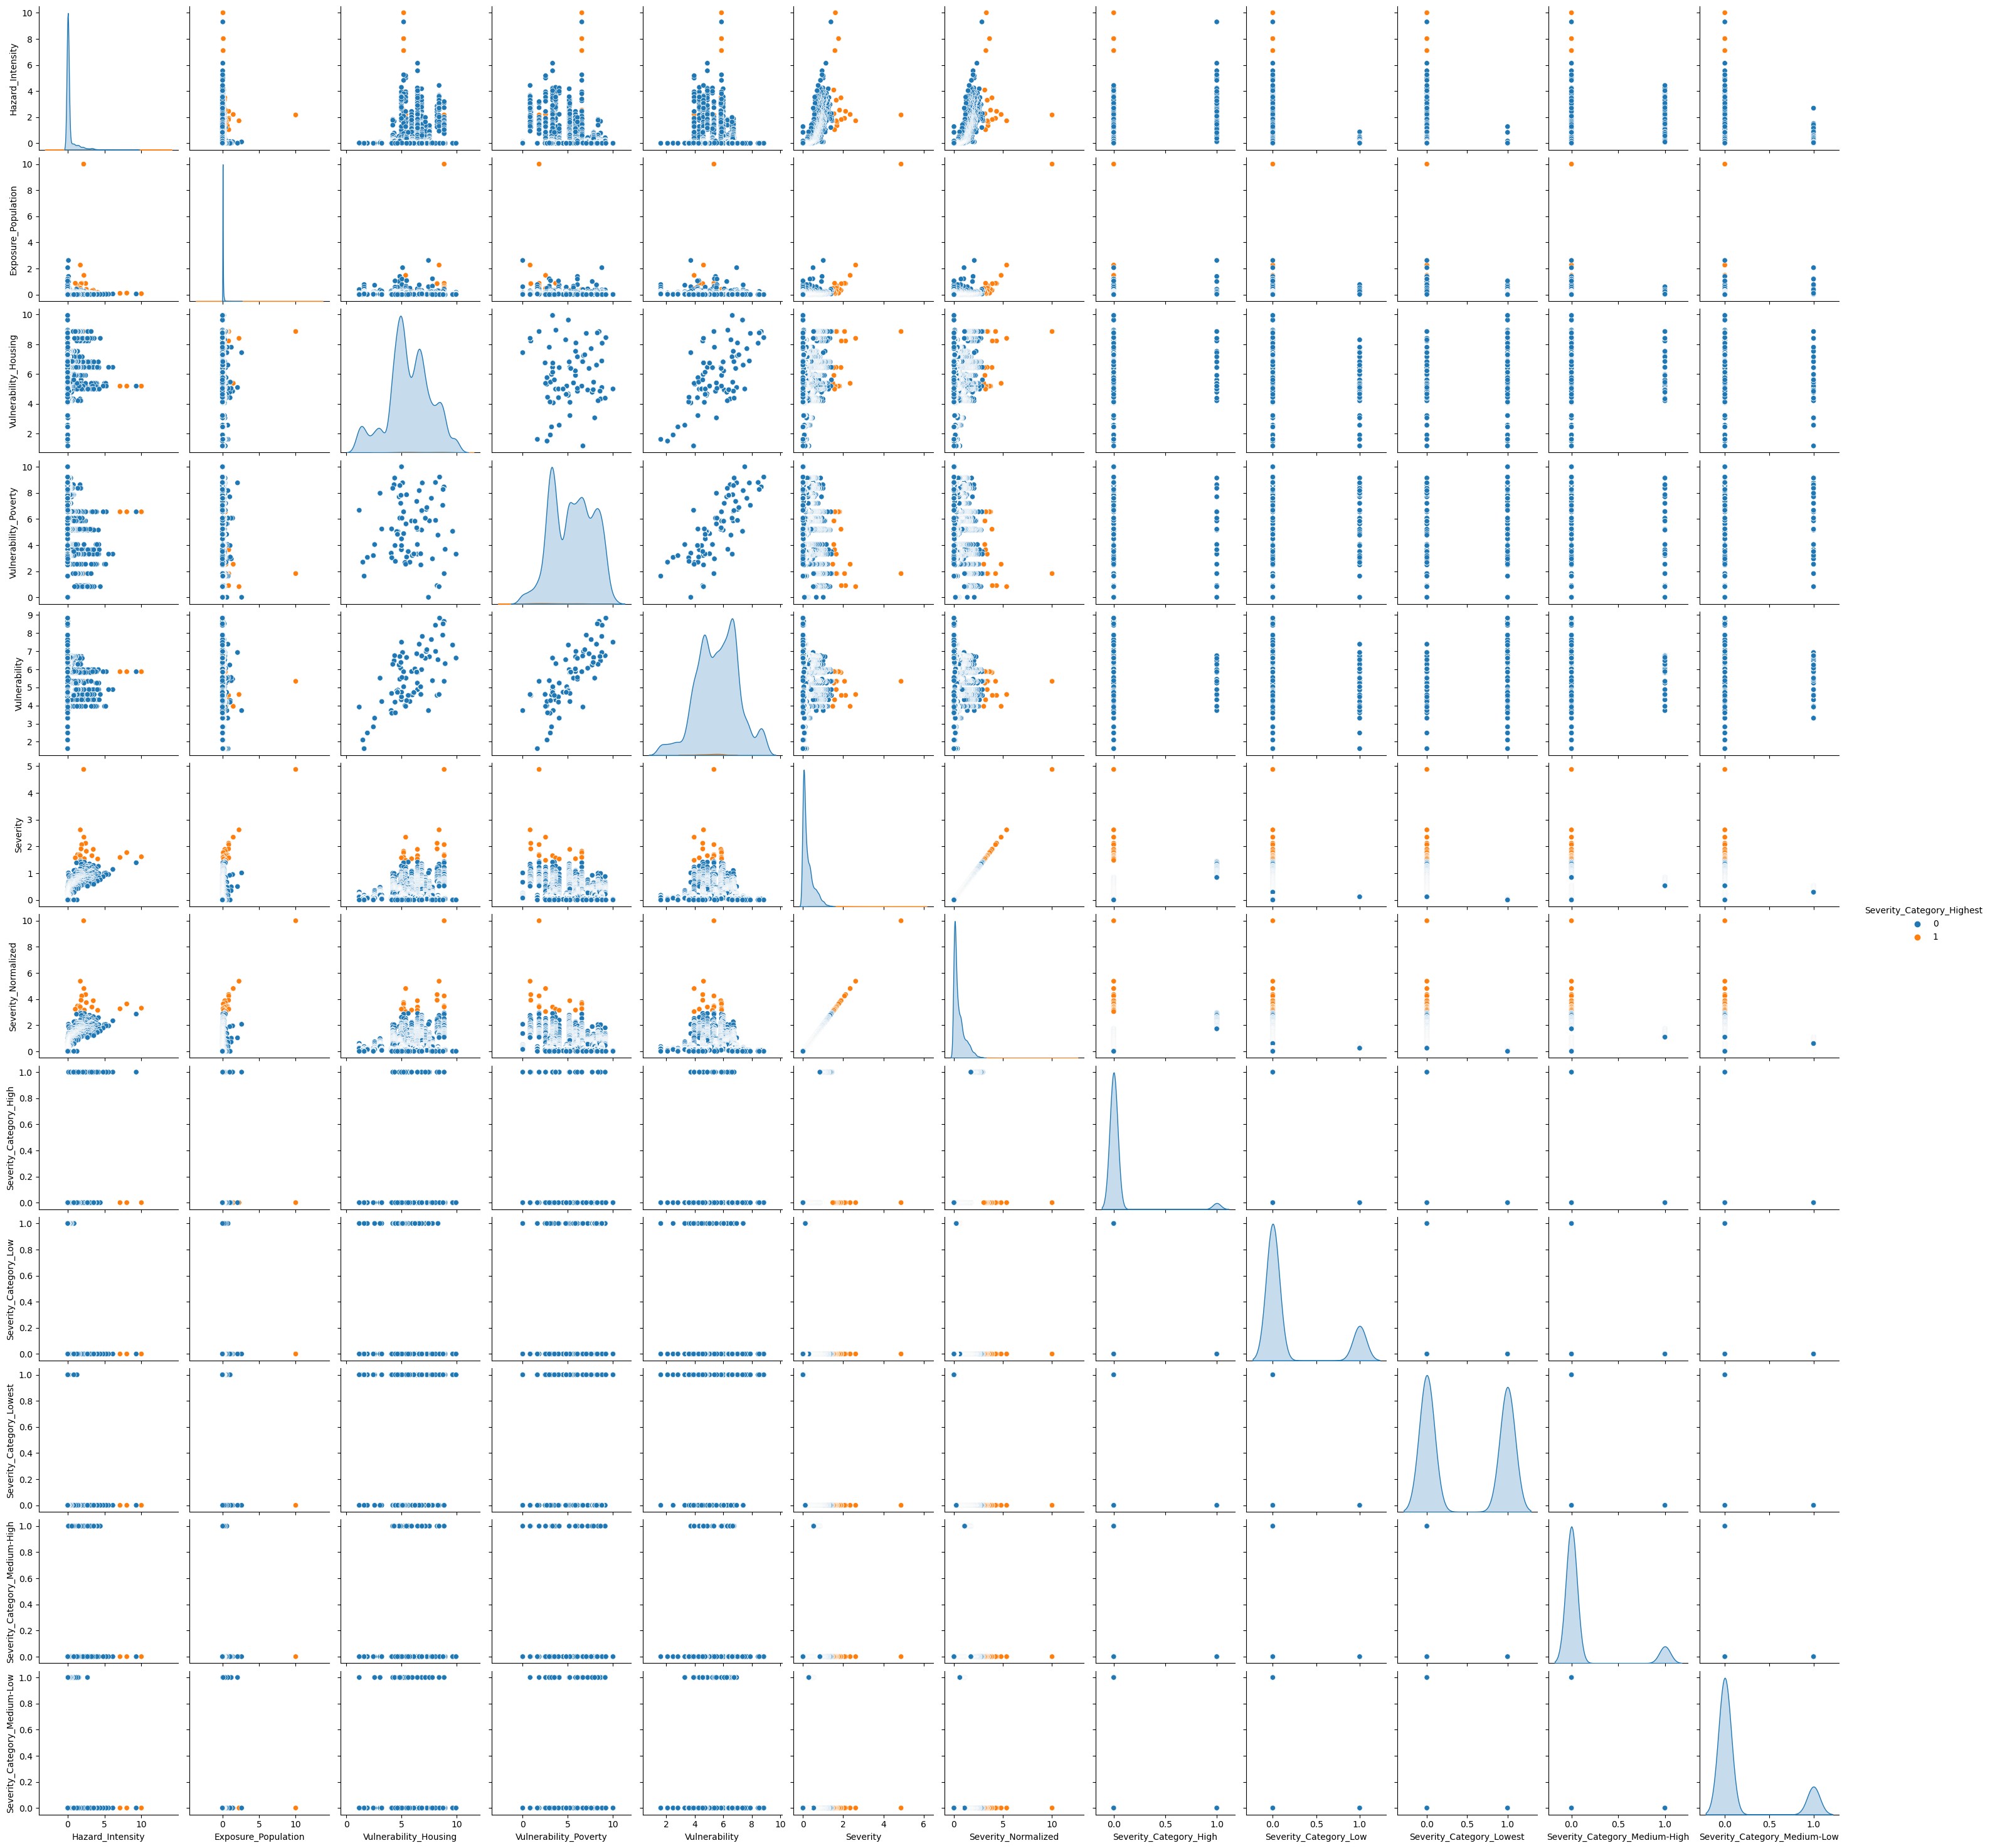

In [4]:
# Visualizations
sns.pairplot(db, hue='Severity_Category_Highest')
plt.show()

In [5]:
#split dataset in features and target variable
feature_cols = ['Hazard_Intensity', 'Exposure_Population', 'Vulnerability_Housing', 'Vulnerability_Poverty','Vulnerability']
X = data[feature_cols] # Features
y = data['Severity_Category']

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

[Text(0.2772952251552795, 0.9666666666666667, 'X[0] <= 0.007\ngini = 0.686\nsamples = 2789\nvalue = [122, 10, 554, 1348, 291, 464]'),
 Text(0.07142857142857142, 0.9, 'X[0] <= 0.005\ngini = 0.074\nsamples = 1320\nvalue = [0, 0, 50, 1269, 0, 1]'),
 Text(0.049689440993788817, 0.8333333333333334, 'X[1] <= 0.245\ngini = 0.03\nsamples = 1242\nvalue = [0, 0, 19, 1223, 0, 0]'),
 Text(0.031055900621118012, 0.7666666666666667, 'X[0] <= 0.003\ngini = 0.021\nsamples = 1225\nvalue = [0, 0, 13, 1212, 0, 0]'),
 Text(0.012422360248447204, 0.7, 'X[1] <= 0.125\ngini = 0.004\nsamples = 1099\nvalue = [0, 0, 2, 1097, 0, 0]'),
 Text(0.006211180124223602, 0.6333333333333333, 'gini = 0.0\nsamples = 1027\nvalue = [0, 0, 0, 1027, 0, 0]'),
 Text(0.018633540372670808, 0.6333333333333333, 'X[1] <= 0.125\ngini = 0.054\nsamples = 72\nvalue = [0, 0, 2, 70, 0, 0]'),
 Text(0.012422360248447204, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.024844720496894408, 0.5666666666666667, 'X

In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9506688963210702


In [9]:
print(clf.predict([[0.05, 10, 2.5, 1.2, 1.8]]))

['Medium-Low']


C:\Users\u1429032\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


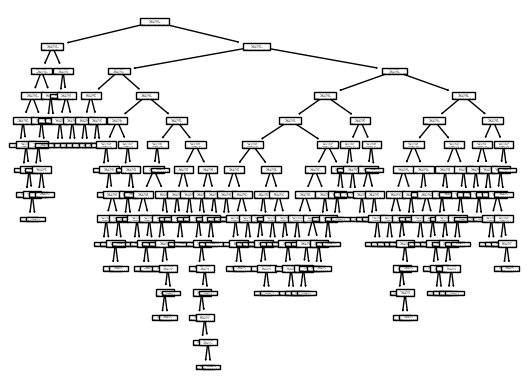

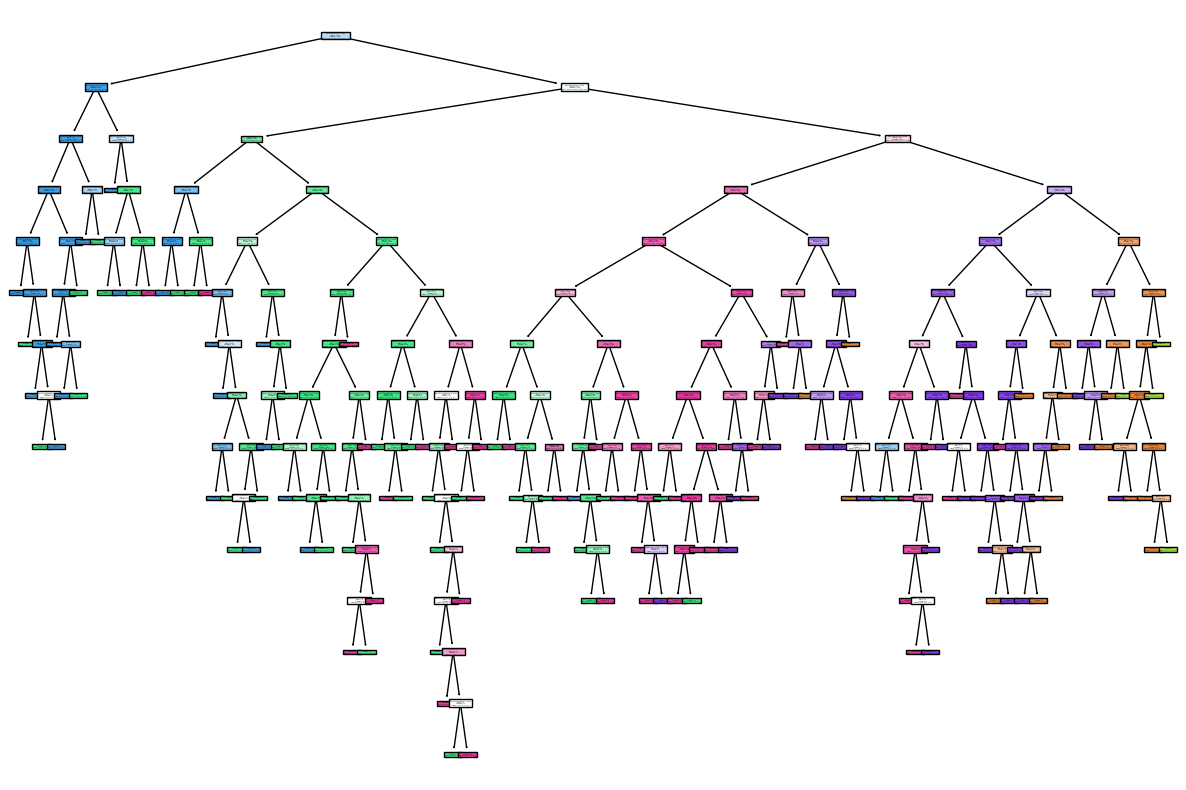

In [10]:
#Decision_Tree_Visualization

from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

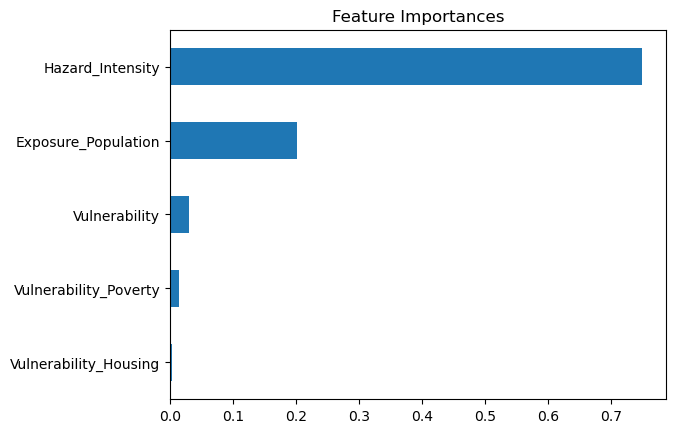

In [11]:
#Feature Importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()